In [ ]:
Lfrom google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
import matplotlib.pyplot as plt

import numpy as np
import cv2
from torch.autograd import Variable

In [ ]:
test_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((150,150)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [ ]:
PATH = '/content/drive/MyDrive/covid-19/model/densenet_covid_model.pt'
device = torch.device('cpu')
class_names = ['Normal', 'Covid-19']

In [ ]:
#Defining Model Architecture
def CNN_Model(pretrained):
    model = models.densenet121(pretrained=pretrained)
    num_ftrs = model.classifier.in_features
    model.classifier = nn.Linear(num_ftrs, len(class_names))
    model.to(torch.device('cpu'))
    return model
inf_model = CNN_Model(pretrained=False)

In [ ]:
inf_model.to(torch.device('cpu'))
inf_model.load_state_dict(torch.load(PATH, map_location='cpu'))
inf_model.eval()
print('Inference Model Loaded on CPU')

Inference Model Loaded on CPU


In [ ]:
def predict(img_path):
    image = cv2.imread(img_path)
    if np.array(image).shape[-1] == 4:
        image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
    image_tensor = test_transforms(image)
    image_tensor = image_tensor.unsqueeze_(0)
    input = Variable(image_tensor)
    # print(input.shape)
    input = input.to(torch.device('cpu'))
    out = inf_model(input)
    _, preds = torch.max(out, 1)
    idx = preds.cpu().numpy()[0]
    pred_class = class_names[idx]
    score = out[0][0].item()
    plt.imshow(np.array(image))
    print("Predicted: {}".format(pred_class))

Predicted: Normal


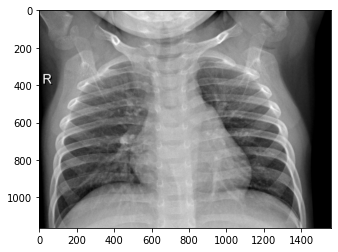

In [ ]:
predict('/content/drive/MyDrive/covid-19/normal/NORMAL2-IM-0851-0001-0001.jpeg')

Predicted: Covid-19


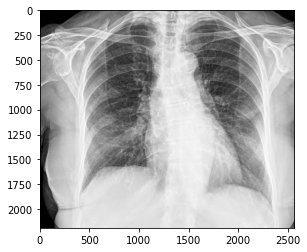

In [ ]:
predict('/content/drive/MyDrive/covid-19/covid-19/covid-19-pneumonia-14-PA.png')